## 4.4 Методы интегрального сглаживания
### 4.4.1. Постановка задачи

Часто в ходе физических экспериментов экспериментальные данные представляются в виде 
* Таблиц 
* Сеточных функций $y_i=f(x_i) \pm \varepsilon_i$, где $\varepsilon_i$ - погрешность измерения.

Например, может быть получена следующая зависимость:

In [61]:
import math
print('x_i,             y_i')
for i in range(1,6):
    print(i, '     ', math.sin(i))

x_i,             y_i
1       0.8414709848078965
2       0.9092974268256817
3       0.1411200080598672
4       -0.7568024953079282
5       -0.9589242746631385


Если просто соединить данные экспериментально полученные точки с помощью прямой, то такое приближение для всего процесса будет довольно неточным:

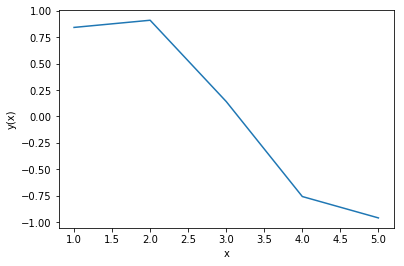

In [59]:
#Импортируем один из пакетов Matplotlib
import pylab
#Импортируем пакет со вспомогательными функциями
from matplotlib import mlab
# Шаг между точками
dx = 1

#Создадим список координат по оси 
#X на отрезке [-xmin; xmax], включая концы
xlist = mlab.frange (1, 5, dx)

# Вычислим значение функции в заданных точках
ylist = [math.sin(x) for x in xlist]

#Нарисуем одномерный график
pylab.plot(xlist, ylist)
pylab.xlabel('x')
pylab.ylabel('y(x)')

#Покажем окно с нарисованным графиком
pylab.show()

Положим, что полученная таблица является реализацией эмпирической гладкой зависимости

$\widetilde{f}_m(x, \overline{a})$ с неизвестным параметром $\overline{a}$, который в общем случае является вектором размерности $m+1$:

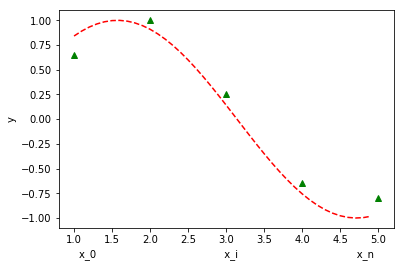

In [61]:
import numpy as np
import matplotlib.pyplot as plt

t1 = np.arange(1., 5., 0.1)
t2 = np.array([1, 2, 3, 4, 5])
t2_2 = np.array([0.65, 1, 0.25, -0.65, -0.8])

plt.plot(t1, np.sin(t1), 'r--', t2, t2_2, 'g^')
plt.ylabel('y')
plt.xlabel('x_0                                         x_i                                      x_n')
plt.show()

где красный график отражает сглаженную зависимость $\widetilde{f}_m(x, \overline{a})$, а зелёный - некоторые табличные данные.

Для определения данной сглаженной зависимости можно использовать разные формы её записи и использовать разные условия согласования $\widetilde{f}_m(x, \overline{a})$ с исходной функцией $y_i=f(x_i) \pm \varepsilon_i$.

Удобно представить зависимость в виде обобщенного многочлена:

$$\widetilde{f}_m(x, \overline{a}) = \sum\limits_{j=0}^{m}a_j\phi_j(x)=a_0\phi_0(x)+a_1\phi_1(x)+...+a_m\phi_m(x) \tag{4.43}         $$
где $\overline{a}$ - вектор неизвестных коэффициентов, $\{\phi_j\}$ - система базисных функций. 

Базисными функциями могут выступать:
* Степенные $\{\phi_j\} = \{x^j\}$
* Многочлены Чебышева
* Тригонометрические $\{\phi_j\} = \{\cos jx\}$

Методами сглаживания могут выступать (более подробно о них поговорим далее):
* Метод наименьших квадратов
* Метод интегрального приближения (также известный как "Метод наилучшего интегрального приближения")

#### Постановка задачи о нахождении сглаживающих многочленов методом наименьших квадратов

Пусть на множестве $\Omega = [a,b]$ задана сетка $$\Omega_n = \{x_i, i=\overline{0,n}\},$$ определяемая $n+1$ точкой, т.е. $x_0, x_1, x_2,...,x_n$, а на сетке задана сеточная функция $$y_i=f(x_i),$$
где $i=\overline{0,n}$.

Предполагается, что функция получена в ходе некоторого эксперимента с погрешностью $\varepsilon_i$.
В качестве сглаживающей функции будет использоваться многочлен 4.43 со степенью, удовлетворяющей условию $0 \leq m \leq n$.

Требуется найти такие коэффициенты $a_0, a_1, a_2,...,a_m$, при которых выполняется интегральное условие согласования:

$$ \delta_m(\overline{a}) = \sqrt{\frac{1}{1+n}\sum\limits_{i=0}^{n} [\widetilde{f}_m(x, \overline{a}) - f_i]^2} \rightarrow \min\limits_{\overline{a}}, \tag{4.44} $$
т.е. такой вектор $\overline{a}$, который обеспечивает минимум среднеквадратичной погрешности $ \delta_m(\overline{a})$.


Ключевые особенности сглаживания данного типа в отличие от решения задачи интерполяции:
* Интерполяция - точечный метод. Как известно, Задача интерполяции – найти функцию $F(x)$, принимающую в точках $x_i$ те же значения $y_i$. Т.е. условие интерполяции имеет вид $F(x_i) = y_i$. Рассматриваемые же здесь методы не требуют точного удовлетворения функциональных условий, а требуют выполнения соответствия $\widetilde{f}_m(x, \overline{a})$ и $y_i=y(x_i)$ в среднем.
* Подразумевается, что исходная функция получена в ходе некоторого эксперимента с ненулевой погрешностью.
* Количество точек $n$, в которых задана исходная функция, значительно выше степени многочлена $m$. Таким образом, между ними нет строгого сооветствия, как в интерполяции.

#### Постановка задачи о нахождении сглаживающих многочленов методом интегрального приближения

Пусть на множестве $\Omega = [a,b]$ задана сетка $$\Omega_{m+1} = \{x_i, i=\overline{0,m+1}\},$$
причём $x_0=a<x_1<x_2<...<x_{m+1} = b.$ 

Данная сетка, определяемая $m+2$ несовпадающими узлами, порождает систему из $m+1$ частичных отрезков $[x_i, x_{i+1}], i = i=\overline{0,m}$

Способы задания сеточной функции на данной сетке:
1. На каждом частичном отрезке сетки задаётся величина интеграла $I_i^{i+1}$
2. На частичных отрезках с фиксированным левым узлом $[x_0, x_{1}], [x_0, x_{2}], ..., [x_0, x_{m+1}]$ задаются интегралы $I_0^{i+1}$
3. Задание сеточной функции её значениями $y_i=f(x_i), i=\overline{0,m+1}$, которые известны с погрешностями $\varepsilon_i$. В данном случае вычисляются интегралы $I_i^{i+1},i=\overline{0,m} $ и $ I_0^i, i = \overline{1,m+1}$.

В качестве сглаживающей функции, как и в методе наименьших квадратов, используется многочлен 4.43 степени $m$ со степенными базисными функциями. Требуется найти такие коэффициенты $a_0, a_1, a_2,...,a_m$, при которых выполняется интегральное условие согласования:
* Для первого способа задания оно имеет вид: $\int\limits_{x_i}^{x_{i+1}} \widetilde{f}_m(x, \overline{a}) dx = I_i^{i+1},$ где  $ i=\overline{0,m} \tag{4.45} $
* Для второго способа задания оно имеет вид: $\int\limits_{x_0}^{x_{i}} \widetilde{f}_m(x, \overline{a}) dx = I_0^{i},$ где  $ i=\overline{1,m+1} \tag{4.46} $

### 4.4.2 Метод наименьших квадратов

В соответствии с постановкой задачи, найдем коэффициенты $a_0, a_1, a_2,...,a_m$ многочлена (4.43) $$\widetilde{f}_m(x, \overline{a}) = \sum\limits_{j=0}^{m}a_j\phi_j(x)=a_0\phi_0(x)+a_1\phi_1(x)+...+a_m\phi_m(x), $$ для которых выполняется условие (4.44): $$ \delta_m(\overline{a}) = \sqrt{\frac{1}{1+n}\sum\limits_{i=0}^{n} [\widetilde{f}_m(x, \overline{a}) - f_i]^2} \rightarrow \min\limits_{\overline{a}} \tag{4.47}$$

Очевидно, что минимум в последнем достигается с учётом (4.43), если 
$$\Delta = \sum\limits_{i=0}^{n} [a_0\phi_0(x_i)+a_1\phi_1(x_i)+...+a_m\phi_m(x_i) - f_i]^2 \rightarrow \min\limits_{\overline{a}} \tag{4.48}$$

Т.к. на коэффициенты не наложено никаких ограничений, то применим необходимые условия безусловного экстремума $\frac{\partial \Delta}{\partial a_j} = 0, $ где $ j = 1,...,m. $

В итоге получаем систему уравнений:
\begin{equation}
 \begin{cases}
   \frac{\partial \Delta}{\partial a_0} = 2 \cdot \sum\limits_{i=0}^{n} [a_0\phi_0(x_i)+a_1\phi_1(x_i)+...+a_m\phi_m(x_i) - f_i] \cdot \phi_0(x_i) = 0 , 
   \\
   \frac{\partial \Delta}{\partial a_1} = 2 \cdot \sum\limits_{i=0}^{n} [a_0\phi_0(x_i)+a_1\phi_1(x_i)+...+a_m\phi_m(x_i) - f_i] \cdot \phi_1(x_i) = 0,
   \\
   ...
   \\
   \frac{\partial \Delta}{\partial a_m} = 2 \cdot \sum\limits_{i=0}^{n} [a_0\phi_0(x_i)+a_1\phi_1(x_i)+...+a_m\phi_m(x_i) - f_i] \cdot \phi_m(x_i) = 0.
 \end{cases} \tag{4.49}
\end{equation}


Для компактной записи полученного результата удобно использовать скалярное произведение. 

Скалярным произведением функций $\phi_k(x)$ и $\phi_l(x)$ называется сумма произведений значений функций, вычисленных во всех рассматриваемых точках $x_i$:

$$ (\phi_k, \phi_l) = \sum\limits_{i=0}^{n} \phi_k(x_i) \phi_l(x_i). $$

Тогда запишем систему в нормальной форме:

\begin{equation}
 \begin{cases}
   (\phi_0, \phi_0)a_0 + (\phi_0, \phi_1)a_1 + ... + (\phi_0, \phi_m)a_m = (f, \phi_0), 
   \\
   (\phi_1, \phi_0)a_0 + (\phi_1, \phi_1)a_1 + ... + (\phi_1, \phi_m)a_m = (f, \phi_1), 
   \\
   ...
   \\
   (\phi_m, \phi_0)a_0 + (\phi_m, \phi_1)a_1 + ... + (\phi_m, \phi_m)a_m = (f, \phi_m).
 \end{cases} \tag{4.50}
\end{equation} 
где $ (f, \phi_k) = \sum\limits_{i=0}^{n} f_i \phi_k(x_i) $. Таким образом, имеется $m+1$ линейное уравнение с $m+1$ неизвестными $a_0, a_1, a_2,...,a_m$. 

Так как $(\phi_k, \phi_l) = (\phi_l, \phi_k)$, то матрица $A$, полученная из системы 4.50 является симметрической, т.е. её  элементы симметричны относительно главной диагонали. Если базисные функции $\phi_0,...,\phi_m$ линейно независимы, то определитель матрицы не равен нулю, решение системы существует и является единственным. 

#### Применение степенных базисных функций

В качестве базисных функций используем степенные:
$$\phi_j(x) = x^j, j=\overline{0,m}.$$
Тогда многочлен 4.43 имеет вид:
$$\widetilde{f}_m(x, \overline{a}) = \sum\limits_{j=0}^{m}a_jx^j=a_0+a_1x+...+a_mx^m \tag{4.51}         $$
Тогда 
$$ (f, \phi_j) = \sum\limits_{i=0}^{n}f_ix_i^j$$
$$ (\phi_k, \phi_l) = \sum\limits_{i=0}^{n}x_i^{k+l}$$
$$ (\phi_k, \phi_k) = \sum\limits_{i=0}^{n}x_i^{2k}$$
Система (4.50) преобразуется к виду:

\begin{equation}
 \begin{cases}
   (\sum\limits_{i=0}^{n}1)a_0 + (\sum\limits_{i=0}^{n}x_i)a_1 + ... + (\sum\limits_{i=0}^{n} x_i^m)a_m = \sum\limits_{i=0}^{n}f_i, 
   \\
   (\sum\limits_{i=0}^{n}x_i)a_0 + (\sum\limits_{i=0}^{n}x_i^2)a_1 + ... + (\sum\limits_{i=0}^{n} x_i^{m+1})a_m = \sum\limits_{i=0}^{n}f_i x_i, 
   \\
   ...
   \\
  (\sum\limits_{i=0}^{n}x_i^m)a_0 + (\sum\limits_{i=0}^{n}x_i^{m+1})a_1 + ... + (\sum\limits_{i=0}^{n} x_i^{2m})a_m = \sum\limits_{i=0}^{n}f_ix_i^m.
 \end{cases} \tag{4.52}
\end{equation} 

Обозначим 

$$ s_0 = n + 1,$$ 
$$t_0 = f_0 + f_1 + ... + f_n,$$
$$ s_k = x_0^k + x_1^k + x_n^k, \text{ где } k = 1,...,2m, \tag{4.53_0}$$
$$ t_k = x_0^kf_0 + x_1^kf_1 + ... + x_n^kf_n, \text{ где } k = 1,...,m. $$ 

Тогда система 4.52 преобразуется к виду:
\begin{equation}
 \begin{cases}
   s_0 a_0 + s_1 a_1 + ... + s_m a_m = t_0, 
   \\
   s_1 a_0 + s_2 a_1 + ... + s_{m+1} a_m = t_1, 
   \\
   ...
   \\
   s_m a_0 + s_{m+1} a_1 + ... + s_{2m} a_m = t_m.
 \end{cases} \tag{4.53}
\end{equation} 

Решая СЛУ, находим $a_0, a_1, a_2,...,a_m$, подставляем в $\widetilde{f}_m(x, \overline{a})$ и получаем искомую формулу, которая сглаживает экспериментальные данные. Данная функция является более плавной, по сравнению с ломаной, проведенной через заданные экспериментальные точки. 

#### Методика решения задачи сглаживания

1. Вычислить коэффициенты $s_k$, где $k=\overline{0,2m}$ и $t_k$, где $k=\overline{0,m}$ по заданной сеточной функции и записать систему 4.53.
2. Решить полученную систему одним из методов решения СЛУ и найти коэффициенты $a_0, a_1, a_2,...,a_m$.
3. Записать искомую сглаживающую функцию $\widetilde{f}_m(x, \overline{a}) = a_0 + a_1x + ... + a_mx^m.$

Замечания:
* Если для сеточной функции, заданной на $n+1$ точке, определять многочлен степени $m=n$ методом наименших квадратов, то $\widetilde{f}_m(x, \overline{a})$ совпадает с интерполяционным многочленом. При этом $\Delta = 0$ и $\delta_m(\overline{a}) = 0$.
* В каждом отдельном случае может быть оптимальная степень $m$. Если все $\varepsilon_i$ одинаковы и равны $\varepsilon$, то, определив $a_j$ и $\delta_m(\overline{a})$ можно выявить три случая:
    - Если $\delta_m(\overline{a}) >> \varepsilon$, то аппроксимация слишком грубая, т.е. степень $m$ мала и стоит её увеличить. 
    - Если $\delta_m(\overline{a}) << \varepsilon$, то аппроксимация недостоверна и степень $m$ нужно уменьшить.
    - Если $\delta_m(\overline{a}) \approx \varepsilon$, то степень оптимальна.
* Система при $m >> 1$ становится плохо обусловленной и определить полином $\delta_m(\overline{a})$ практически невозможно, т.к. строки матрицы $A$ становятся почти линейно зависимыми, т.е. $A\approx 0$. В этом случае надо использовать полиномы Чебышева или использовать метод интегрального приближения.
* Метод наименьших квадратов иногда не учитывает локальных свойств аппроксимируемых функций, т.е. могут быть не отмечены отдельнные единичные "всплески".
* При изменении степени $m$ все коэффициенты необходимо рассчитывать заново. 

#### Пример 4.9 Решим задачу аппроксимации сеточной функции, заданной таблицей

In [82]:
i = [0, 1, 2, 3]
xi = [2, 3, 4, 5]
fi = [7, 5, 8, 7]
print('i ', '  x_i ', ' f_i ')
for idx in i:
    print(idx, '   ', xi[idx], '   ', fi[idx])

i    x_i   f_i 
0     2     7
1     3     5
2     4     8
3     5     7


#### Случай 1: 
$m = 1$

Нужно решить систему

\begin{equation}
 \begin{cases}
   s_0 a_0 + s_1 a_1 = t_0, 
   \\
   s_1 a_0 + s_2 a_1 = t_1
 \end{cases}
\end{equation} 

В соответствии с 4.53_0 получаем:

In [31]:
t0 = sum(fi)
t1 = sum(map(lambda x, y: y * x, xi, fi)) #x_i * f_i
s0 = i[len(i) - 1] + 1 
s1 = sum(xi)

     # сумма квадратов xi
s2 = sum(map(lambda y: y ** 2, xi))


print('t_0 = ', t0)
print('t_1 = ', t1)
print('s_0 = ', s0)
print('s_1 = ', s1)
print('s_2 = ', s2)

t_0 =  27
t_1 =  96
s_0 =  4
s_1 =  14
s_2 =  54


Таким образом, система 4.53 имеет вид:
\begin{equation}
 \begin{cases}
   4 a_0 + 14 a_1 = 27, 
   \\
   14 a_0 + 54 a_1 = 96
 \end{cases}
\end{equation} 
Найдём $a_0 $ и $ a_1$ с помощью метода Гаусса:

In [78]:
def myGauss(m):
    # eliminate columns
    for col in range(len(m[0])):
        for row in range(col+1, len(m)):
            r = [(rowValue * (-(m[row][col] / m[col][col]))) for rowValue in m[col]]
            m[row] = [sum(pair) for pair in zip(m[row], r)]
    # now backsolve by substitution
    ans = []
    m.reverse() # makes it easier to backsolve
    for sol in range(len(m)):
            if sol == 0:
                ans.append(m[sol][-1] / m[sol][-2])
            else:
                inner = 0
                # substitute in all known coefficients
                for x in range(sol):
                    inner += (ans[x]*m[sol][-2-x])
                # the equation is now reduced to ax + b = c form
                # solve with (c - b) / a
                ans.append((m[sol][-1]-inner)/m[sol][-sol-2])
    ans.reverse()
    return ans

In [35]:
myGauss([[4, 14, 27], [14, 54, 96]])

[5.7, 0.3]

Таким образом, $\widetilde{f}_1(x, \overline{a}) = 5.7 + 0.3x$ - искомая сглаживающая функция

In [46]:
import math

fmxa = map(lambda y: 5.7 + 0.3 * y, xi)

delt = math.sqrt((1 / (i[len(i) - 1] + 1)) * sum(map(lambda x, y: math.pow(x - y, 2), fmxa, fi)))
delt

1.0368220676663857

$\delta_m(\overline{a}) = 1.0368$.

#### Случай 2: 
$m = 2$

Нужно решить систему

\begin{equation}
 \begin{cases}
   s_0 a_0 + s_1 a_1 + s_2 a_2 = t_0, 
   \\
   s_1 a_0 + s_2 a_1 + s_3 a_2 = t_1,
   \\
   s_2 a_0 + s_3 a_1 + s_4 a_2 = t_2
 \end{cases}
\end{equation} 

В соответствии с 4.53_0 получаем:

In [50]:
t0 = sum(fi)
t1 = sum(map(lambda x, y: y * x, xi, fi)) #x_i * f_i
t2 = sum(map(lambda x, y: y * (x ** 2), xi, fi)) #x_i^2 * f_i

s0 = i[len(i) - 1] + 1 
s1 = sum(xi)

s2 = sum(map(lambda y: y ** 2, xi)) # сумма квадратов xi
s3 = sum(map(lambda y: y ** 3, xi))
s4 = sum(map(lambda y: y ** 4, xi))


print('t_0 = ', t0)
print('t_1 = ', t1)
print('t_2 = ', t2)

print('s_0 = ', s0)
print('s_1 = ', s1)
print('s_2 = ', s2)
print('s_3 = ', s3)
print('s_4 = ', s4)

t_0 =  27
t_1 =  96
t_2 =  376
s_0 =  4
s_1 =  14
s_2 =  54
s_3 =  224
s_4 =  978


Таким образом, система 4.53 имеет вид:

\begin{equation}
 \begin{cases}
   4 a_0 + 14 a_1 + 54 a_2 = 27, 
   \\
   14 a_0 + 54 a_1 + 224 a_2 = 96,
   \\
   54 a_0 + 224 a_1 + 978 a_2 = 376
 \end{cases}
\end{equation} 
Найдём  $a_0,a_1$  и  $a_2$  с помощью метода Гаусса:

In [51]:
myGauss([[4, 14, 54, 27], [14, 54, 224, 96], [54, 224, 978, 376]])

[8.45, -1.45, 0.25]

Тогда  $\widetilde{f}_2(x, \overline{a}) = 8.45 - 1.45x + 0.25х^2$ - искомая сглаживающая функция

In [52]:
fmxa = map(lambda y: 8.45 - 1.45 * y + 0.25 * y * y, xi)

delt = math.sqrt((1 / (i[len(i) - 1] + 1)) * sum(map(lambda x, y: math.pow(x - y, 2), fmxa, fi)))
delt

1.0062305898749055

$\delta_m(\overline{a}) = 1.0062$.

#### Пример 4.10 Решим задачу аппроксимации сеточной функции, заданной $y = \ln x$ с погрешностью $\varepsilon = 0.1$ таблицей:

In [53]:
i = [0, 1, 2, 3, 4]
xi = [1, 2, 3, 4, 5]
fi = [-0.07, 0.76, 1, 1.526, 1.449]
print('i ', '  x_i ', ' f_i ')
for idx in i:
    print(idx, '   ', xi[idx], '   ', fi[idx])

i    x_i   f_i 
0     1     -0.07
1     2     0.76
2     3     1
3     4     1.526
4     5     1.449


Нужно, чтобы $\delta$ было меньше $\varepsilon = 0.1$. Начнём с $m=1$ аналогично прошлой задаче:

In [54]:
t0 = sum(fi)
t1 = sum(map(lambda x, y: y * x, xi, fi)) #x_i * f_i
s0 = i[len(i) - 1] + 1 
s1 = sum(xi)

     # сумма квадратов xi
s2 = sum(map(lambda y: y ** 2, xi))


print('t_0 = ', t0)
print('t_1 = ', t1)
print('s_0 = ', s0)
print('s_1 = ', s1)
print('s_2 = ', s2)

t_0 =  4.665
t_1 =  17.799
s_0 =  5
s_1 =  15
s_2 =  55


\begin{equation}
 \begin{cases}
   5 a_0 + 15 a_1 = 4.665, 
   \\
   15 a_0 + 55 a_1 = 17.799
 \end{cases}
\end{equation} 

In [55]:
myGauss([[5, 15, 4.665], [15, 55, 17.799]])

[-0.20819999999999955, 0.38039999999999985]

In [57]:
fmxa = map(lambda y: -0.2082 + 0.3804 *y, xi)

delt = math.sqrt((1 / (i[len(i) - 1] + 1)) * sum(map(lambda x, y: math.pow(x - y, 2), fmxa, fi)))
delt

0.20556770174324568

$0.205 > 0.1$, значит не подходит и попробуем $m=2:$

In [58]:
t0 = sum(fi)
t1 = sum(map(lambda x, y: y * x, xi, fi)) #x_i * f_i
t2 = sum(map(lambda x, y: y * (x ** 2), xi, fi)) #x_i^2 * f_i

s0 = i[len(i) - 1] + 1 
s1 = sum(xi)

s2 = sum(map(lambda y: y ** 2, xi)) # сумма квадратов xi
s3 = sum(map(lambda y: y ** 3, xi))
s4 = sum(map(lambda y: y ** 4, xi))


print('t_0 = ', t0)
print('t_1 = ', t1)
print('t_2 = ', t2)

print('s_0 = ', s0)
print('s_1 = ', s1)
print('s_2 = ', s2)
print('s_3 = ', s3)
print('s_4 = ', s4)

t_0 =  4.665
t_1 =  17.799
t_2 =  72.611
s_0 =  5
s_1 =  15
s_2 =  55
s_3 =  225
s_4 =  979


\begin{equation}
 \begin{cases}
   5 a_0 + 15 a_1 + 55 a_2 = 4.665, 
   \\
   15 a_0 + 55 a_1 + 225 a_2 = 17.799,
   \\
   55 a_0 + 225 a_1 + 979 a_2 = 72.611
 \end{cases}
\end{equation} 
Найдём  $a_0,a_1$  и  $a_2$  с помощью метода Гаусса:

In [59]:
myGauss([[5, 15, 55, 4.665], [15, 55, 225, 17.799], [55, 225, 979, 72.611]])

[-0.9721999999999917, 1.035257142857136, -0.10914285714285603]

In [60]:
fmxa = map(lambda y: -0.9721 + 1.0352 *y - 0.1091 *y*y , xi)

delt = math.sqrt((1 / (i[len(i) - 1] + 1)) * sum(map(lambda x, y: math.pow(x - y, 2), fmxa, fi)))
delt

0.0943624289640745

$0.094 < 0.1$, подходит, задача решена.

#### Применение эмпирических формул

Исходя из приблизительного сходства с экспериментальными данными выбирается одна из двухпараметрических формул:
$$\widetilde{f}(x, a_0,a_1) = a_0+\frac{a_1}{x}$$
$$\widetilde{f}(x, a_0,a_1) = a_0a_1^x$$
$$\widetilde{f}(x, a_0,a_1) = a_0+a_1 \ln x$$
$$\widetilde{f}(x, a_0,a_1) = \frac{1}{a_0+a_1x}$$
$$\widetilde{f}(x, a_0,a_1) = a_0e^{a_1x}$$
$$\widetilde{f}(x, a_0,a_1) = \frac{a_0}{a_1 + x}$$
$$\widetilde{f}(x, a_0,a_1) = \frac{x}{a_0 + a_1x}$$
$$\widetilde{f}(x, a_0,a_1) = \frac{1}{a_0 + a_1e^{-x}}$$

Требуется найти коэффициенты $a_1$ и $ a_2$, для которых 
$$ \Delta = \sum\limits_{i=0}^{n} [\widetilde{f}(x, a_0,a_1) - f_i]^2 \rightarrow \min\limits_{\overline{a}} $$
Применяются необходимые условия экстремума: $$\frac{\partial \Delta}{\partial a_0} = 0, \;\;\;\;\;\; \frac{\partial \Delta}{\partial a_1} = 0.$$
Таким образом, в отличие от степенных функций, решение сводится к решению двух нелинейных алгебраических уравнений методом простых итераций, Зейделя, Ньютона или их модификациями.

#### Применение ортогональных базисных функций

При нахождении коэффициентов многочлена 4.43 с помощью ортогональных базисных функций нет необходимости решать систему 4.53. 

Функции $\phi_k(x)$ и $\phi_l(x)$ называются ортогональными во всех рассматриваемых точках $x_i$, если их скалярное произведение на этом множестве точек равно нулю:

$$ (\phi_k, \phi_l) = \sum\limits_{i=0}^{n} \phi_k(x_i) \phi_l(x_i) = 0, \;\;\;\; k \neq l. $$

Система функций ортогональная на множестве точек, если все функции этой системы попарно ортогональны на этом множестве точек.
Таким образом, все недиагональные элементы матрицы становятся равны 0 и коэффициенты находятся по формуле:

$$a_j = \frac{(f, \phi_j)}{(\phi_j, \phi_j)} = \frac{\sum\limits_{i=0}^{n} f_j \cdot \phi_j(x_i) }{\sum\limits_{i=0}^{n} \phi_j^2(x_i)}, \;\;\;\; j = 0,1,...,m. \tag{4.54}$$
Коэффициенты 4.54 называются Коэффициентами Фурье функции $y_i = f(x_i)$ относительно ортогональной системы функций.

#### Теорема 4.2 О точечном среднеквадратичном приближении функций ортогональными многочленами

Для функции $y_i = f(x_i)$, определенной на множестве точек $\{x_i\}$ обобщенный многочлен $m-$той степени $Q_m(x)$ с коэффициентами Фурье относительно ортогональной на этом множестве точек системы функций $\{\phi_j(x)\}$ является многочленом наилучшего среднеквадратичного приближения этой функции, причём квадрат наименьшего среднеквадратичного отклонения определяется соотношением:
$$\rho^2(f, Q_m) = ||f||^2 - \sum\limits_{j=0}^{m}a_j^2||\phi_j||^2, \tag{4.55}$$
где $a_j$ - коэффициенты Фурье, определяемые по формуле 4.54,
$$||f||^2 = \sum\limits_{i=0}^{n}f_i^2$$
$$ ||\phi_j||^2 = \sum\limits_{i=0}^{n} \phi_j^2(x_i) $$
$$ \rho(f, Q_m) = \sqrt{\sum\limits_{i=0}^{n} [Q_m(x_i) - f_i]^2}$$
Погрешность данного приближения вычисляется по формуле:
$$\overline{\rho}(f, Q_m) = \frac{\rho(f, Q_m) }{||f||}\tag{4.56}$$

#### Многочлены Чебышева
Многочленами Чебышева $g_0(x),...,g_m(x)$ на множестве точек $\{x_i\}$ называются алгебраические многочлены, которые ортогональны на этом множестве, с нормой $||g_k||$ отличной от нуля и определяется следующими рекуррентными формулами:
$$g_0(x) = 1$$
$$g_1(x) = x-a$$
$$g_k(x) = (x-a_k)g_{k-1}(x)-b_kg_{k-2}(x), \;\;\;\; k = 2,3,4,...,m \tag{4.57}$$
где

$$a = \frac{1}{n+1}\sum\limits_{i=0}^{n}x_i, \;\;\;\; a_k = \frac{\sum\limits_{i=0}^{n}x_i \cdot g_{k-1}^2(x_i)}{\sum\limits_{i=0}^{n} g_{k-1}^2(x_i)}, \;\;\;\; b_k = \frac{\sum\limits_{i=0}^{n}x_i \cdot g_{k-2}(x_i) \cdot g_{k-1}(x_i) }{\sum\limits_{i=0}^{n} g_{k-2}^2(x_i)} $$

#### Пример 4.11 
Дана сеточная функция

In [62]:
i = [0, 1, 2, 3]
xi = [0, 1, 3, 4]
fi = [4, 0, 1, 2]
print('i ', '  x_i ', ' f_i ')
for idx in i:
    print(idx, '   ', xi[idx], '   ', fi[idx])

i    x_i   f_i 
0     0     4
1     1     0
2     3     1
3     4     2


Необходимо сгладить эту функцию алгебраическими многочленами наилучшего среднеквадратичного приближения
$Q_0(x),Q_1(x),Q_2(x),Q_3(x)$ где 
$$Q_0(x) = a_0g_0(x),$$
$$Q_1(x) = a_0g_0(x) + a_1g_1(x),$$
$$Q_2(x) = a_0g_0(x) + a_1g_1(x) + a_2g_2(x),$$
$$Q_3(x) = a_0g_0(x) + a_1g_1(x) + a_2g_2(x) +  a_3g_3(x)$$

и найти погрешности $\overline{\rho}(f, Q_0),\overline{\rho}(f, Q_1), \overline{\rho}(f, Q_2), \overline{\rho}(f, Q_3)$.

Шаг 1: определим многочлены Чебышева $g_0(x),g_1(x),g_2(x),g_3(x)$ в соответствии с 4.57:

In [74]:
n = 3

#g_0 = 1
#----------------------------
#g_1 = x - a 

a_1 = (1 / (n + 1)) * sum(xi)
#----------------------------
print('g_0 = 1')
print('g_1 = x -', a_1)
 

g_0 = 1
g_1 = x - 2.0


Вычисляем $g_2(x) = (x-a_2)g_1(x) - b_2g_0(x)$:

$$a_2 = \frac{\sum\limits_{i=0}^{3}x_i \cdot g_{1}^2(x_i)}{||g_1||^2}, \;\;\;\;  b_2 = \frac{\sum\limits_{i=0}^{3}x_i \cdot g_{0}(x_i) \cdot g_{1}(x_i) }{||g_0||^2}$$

In [73]:
g_0_norm = sum(map(lambda y: 1 ** 2, xi))
g_1_norm = sum(map(lambda y: (y - 2) ** 2, xi))

a_2 = (1 / g_1_norm) * sum(map(lambda y: y * (y - 2) ** 2, xi))
b_2 = (1 / g_0_norm) * sum(map(lambda y: y * (y - 2) * 1, xi))

print('g_0_norm:', g_0_norm)
print('g_1_norm:', g_1_norm)
print('a_2:', a_2)
print('b_2:', b_2)

g_0_norm: 4
g_1_norm: 10
a_2: 2.0
b_2: 2.5


Таким образом, $g_2(x) = (x-2)g_1(x) - 2.5g_0(x) = (x-2) \cdot (x-2) - 2.5 \cdot 1 = (x-2)^2 - 2.5$.

Аналогично вычисляем $g_3(x) = (x-a_3)g_2(x) - b_3g_1(x)$. Неизвестны только $a_3$ и $b_3$:

$$a_3 = \frac{\sum\limits_{i=0}^{3}x_i \cdot g_{2}^2(x_i)}{||g_2||^2}, \;\;\;\;  b_3 = \frac{\sum\limits_{i=0}^{3}x_i \cdot g_{1}(x_i) \cdot g_{2}(x_i) }{||g_1||^2}$$

In [78]:
g_2_norm = sum(map(lambda y: ((y - 2) ** 2 - 2.5) ** 2, xi))

a_3 = (1 / g_2_norm) * sum(map(lambda y: y * ((y - 2) ** 2 - 2.5) ** 2, xi))
b_3 = (1 / g_1_norm) * sum(map(lambda y: y * ((y - 2) ** 2 - 2.5) * (y - 2) , xi))

print('g_2_norm:', g_2_norm)
print('a_3:', a_3)
print('b_3:', b_3)

g_2_norm: 9.0
a_3: 2.0
b_3: 0.9


Таким образом, $g_3(x) = (x-2) \cdot [(x-2)^2 - 2.5] - 0.9 (x-2) = (x-2)^3 - 3.4 (x-2)$.

Сразу посчитаем и $||g_3||^2$, которая понадобится дальше:

In [145]:
g_3_norm = sum(map(lambda y: ((y - 2) ** 3 - 3.4* (y-2)) ** 2, xi))
print('g_3_norm:', g_3_norm)

g_3_norm: 14.400000000000002


Запишем полученные данные в наглядном виде:

In [95]:
g0 = list(map(lambda y: 1, xi))
g1 = list(map(lambda y: (y - 2), xi))
g2 = list(map(lambda y: ((y - 2) ** 2 - 2.5), xi))
g3 = list(map(lambda y: ((y - 2) ** 3 - 3.4 * (y-2)), xi))

print('i ', '  x_i ', ' f_i ', ' g_0 ', ' g_1 ', '   g_2 ', '   g_3 ')
for idx in i:
    print(idx, '   ', xi[idx], '   ', fi[idx], '   ', g0[idx], '   ', g1[idx], '   ', g2[idx], '   ', g3[idx])

i    x_i   f_i   g_0   g_1     g_2     g_3 
0     0     4     1     -2     1.5     -1.2000000000000002
1     1     0     1     -1     -1.5     2.4
2     3     1     1     1     -1.5     -2.4
3     4     2     1     2     1.5     1.2000000000000002


Шаг 2: определим многочлены наилучшего сраднеквадратичного приближения
$$Q_0(x) = a_0g_0(x),$$
$$Q_1(x) = a_0g_0(x) + a_1g_1(x),$$
$$Q_2(x) = a_0g_0(x) + a_1g_1(x) + a_2g_2(x),$$
$$Q_3(x) = a_0g_0(x) + a_1g_1(x) + a_2g_2(x) +  a_3g_3(x)$$

In [99]:
a_0 = sum(map(lambda x, y: x * y, fi, g0)) / g_0_norm
print('Q_0(x) = ', a_0)

Q_0(x) =  1.75


In [103]:
a_1 = sum(map(lambda x, y: x * y, fi, g1)) / g_1_norm
print('Q_1 = ', a_0, ' + ', a_1, '* (x-2) = -0.3x + 2.35') 

Q_1 =  1.75  +  -0.3 * (x-2) = -0.3x + 2.35


In [106]:
a_2 = sum(map(lambda x, y: x * y, fi, g2)) / g_2_norm
print('Q_2 = -0.3x + 2.35 + ', a_2, '* ((x-2)^2 - 2.5) = 0.833 x^2 - 3.63 x + 3.6') 

Q_2 = -0.3x + 2.35 +  0.8333333333333334 * ((x-2)^2 - 2.5) = 0.833 x^2 - 3.63 x + 3.6


In [108]:
a_3 = sum(map(lambda x, y: x * y, fi, g3)) / g_3_norm
print('Q_3 = 0.833 x^2 - 3.63 x + 3.6 ', a_3, '* ((y - 2) ** 3 - 3.4 * (y-2)) = -0.33 x^3 + 2.83 x^2 - 6.5 x + 4') 

Q_3 = 0.833 x^2 - 3.63 x + 3.6  -0.3333333333333333 * ((y - 2) ** 3 - 3.4 * (y-2)) = -0.33 x^3 + 2.83 x^2 - 6.5 x + 4


Запишем полученные данные в наглядном виде:

In [119]:
q0 = list(map(lambda y: 1.75, xi))
q1 = list(map(lambda y: -0.3 * y + 2.35, xi))
q2 = list(map(lambda y: 0.833 * y ** 2 - 3.63 * y + 3.6, xi))
q3 = list(map(lambda y: -0.33 * y ** 3 + 2.83 * y ** 2 - 6.5 * y + 4, xi))

print('i ', '  x_i ', ' f_i ', '   q_0 ', '   q_1 ', '     q_2 ', '   q_3 ')
for idx in i:
    print(idx, '   ', xi[idx], '   ', fi[idx], '   ', 
          round(q0[idx], 2), '   ', round(q1[idx], 2), '   ', round(q2[idx], 2), '   ', round(q3[idx], 2))

i    x_i   f_i     q_0     q_1       q_2     q_3 
0     0     4     1.75     2.35     3.6     4.0
1     1     0     1.75     2.05     0.8     0.0
2     3     1     1.75     1.45     0.21     1.06
3     4     2     1.75     1.15     2.41     2.16


Шаг 3: найдём погрешности приближений  $\overline{\rho}(f, Q_0),\overline{\rho}(f, Q_1), \overline{\rho}(f, Q_2), \overline{\rho}(f, Q_3)$ по формулам 4.55 и 4.56. 

Сначала посчитаем $||f|| = \sqrt{\sum\limits_{i=0}^{3}f_i^2}$:

In [125]:
f_norm = math.sqrt(sum(map(lambda y: y ** 2, fi)))
f_norm

4.58257569495584

Тогда $\overline{\rho}(f, Q_0) = \frac{1}{||f||} \cdot \sqrt{||f||^2 - a_0 ^ 2 \cdot ||g_0||^2} $

In [128]:
pfq0 = (1 / f_norm) * math.sqrt(f_norm ** 2 - a_0  ** 2 * g_0_norm)
pfq0

0.6454972243679028

In [135]:
pfq1 = (1 / f_norm) * math.sqrt(f_norm ** 2 - a_0  ** 2 * g_0_norm - a_1  ** 2 * g_1_norm)
pfq1

0.6113996432854077

In [139]:
pfq2 = (1 / f_norm) * math.sqrt(f_norm ** 2 - a_0  ** 2 * g_0_norm - a_1  ** 2 * g_1_norm 
                                - a_2  ** 2 * g_2_norm)
pfq2

0.27602622373694163

In [153]:
pfq3 = (1 / f_norm) * math.sqrt(f_norm ** 2 - a_0  ** 2 * g_0_norm - a_1  ** 2 * g_1_norm - a_2  ** 2 * g_2_norm 
                                - a_3 ** 2 * round(g_3_norm))
pfq3

0.046004370622823074

Таким образом можно заметить отсутствие необходимости при изменении степени $m$ каждый раз заново рассчитывать коэффициенты, что является одним из преимуществ ортогональных многочленов. 

### 4.4.3. Метод наилучшего интегрального приближения

#### Глобальный способ

В случае глобального способа будем искать коэффициенты сглаживающего многочлена
$$\widetilde{f}_m(x, \overline{a}) = S_m(x) = a_0 + a_1x+...+a_mx^m$$
при условии, что функция задана способом 4.45 или 4.46. 

В случае 4.45 имеем систему
\begin{equation}
 \begin{cases}
   \int\limits_{x_0}^{x_1} (a_0 + a_1x+...+a_mx^m)dx = I_0^1, 
   \\
   \int\limits_{x_1}^{x_2} (a_0 + a_1x+...+a_mx^m)dx = I_1^2,
   \\
   ...
   \\
   \int\limits_{x_m}^{x_{m+1}} (a_0 + a_1x+...+a_mx^m)dx = I_m^{m+1}
 \end{cases} \tag{4.58}
\end{equation} 
А в случае 4.46 имеем:
\begin{equation}
 \begin{cases}
   \int\limits_{x_0}^{x_1} (a_0 + a_1x+...+a_mx^m)dx = I_0^1, 
   \\
   \int\limits_{x_0}^{x_2} (a_0 + a_1x+...+a_mx^m)dx = I_0^2,
   \\
   ...
   \\
   \int\limits_{x_0}^{x_{m+1}} (a_0 + a_1x+...+a_mx^m)dx = I_0^{m+1}
 \end{cases}\tag{4.59}
\end{equation} 
Интегрируя левые части каждой из этих систем и решая соответствующие системы из $m+1$ алгебраического уравнения можно найти искомые коэффиценты $a_0,a_1,...,a_m$ и сглаживающие многочлены $\widetilde{f}_m(x, \overline{a})$.

Примечания:
* Системы 4.58 и 4.59 равносильны и получаются друг из друга путём попарного сложения и вычитания уравнений.
* Эти системы также имеют единственное решение, так как определители матриц этих систем не равны 0.
* При больших $m$ данный глобальный способ использовать не рекомендуется


#### Кусочный способ

Рассмотрим сеточную функцию $y_i=f(x_i),\;\; i = 0,...,n $  и  $h = const$. 

Пусть степень многочлена равна $m$ и он строится на некотором внутреннем отрезке $[x_k, x_{k+m+1}], k = 0,1, ..., n-m-1.$ 

Этот отрезок включает в себя $m+1$ частичных отрезков, на которых заданы интегралы $I_{k}^{k+1}, I_{k+1}^{k+2}, ..., I_{k+m+1}^{k+m}$. 

Для упрощения обозначений будем считать, что для $m=1$ на частичном отрезке $[x_k,x_{k+2}]$ определено дополнительное разбиение этого отрезка на два подотрезка $(p=2)$, для $m=2$ на частичном отрезке $[x_k,x_{k+3}]$ определено дополнительное разбиение на три подотрезка $(p=3)$ и т.д.

Конечно-интегральные разности определяются по следующим формулам:
* Первого порядка ($m=1, p=2$): $$\Delta I_k^{k + \frac{1}{p}} = I_{k + \frac{1}{p}}^{k + \frac{2}{p}} - I_k^{k + \frac{1}{p}} $$
* Второго порядка ($m=2, p=3$): $$\Delta^2 I_k^{k + \frac{1}{p}} = \Delta I_{k + \frac{1}{p}}^{k + \frac{2}{p}} - \Delta I_k^{k + \frac{1}{p}} = I_k^{k + \frac{1}{p}} - 2 I_{k + \frac{1}{p}}^{k + \frac{2}{p}} + I^{k + \frac{3}{p}}_{{k + \frac{2}{p}}}  $$
* $i$-го порядка ($m=i, p=i+1$):
$$\Delta^i I_k^{k + \frac{1}{p}} = \Delta^{i-1} I_{k + \frac{1}{p}}^{k + \frac{2}{p}} - \Delta^{i-1} I_k^{k + \frac{1}{p}} = \sum\limits_{j=0}^{i}(-1)^j C_i^jI^{k + \frac{j+1}{p}}_{k+ \frac{j}{p}}$$

Таким образом, $S_1(x), S_2(x), S_3(x)$ на отрезках $[x_k, x_{k+2}],[x_k, x_{k+3}], [x_k, x_{k+4}]$ получаем:

$$S_1(x) = \frac{2}{h_k}(I_k^{k + \frac{1}{2}} - \frac{1}{2}\Delta I_k^{k + \frac{1}{2}})+ \frac{2^2}{h_k^2} \Delta I_k^{k + \frac{1}{2}} (x-x_k) \tag{4.60}$$

$S_2(x) = \frac{3}{h_k}(I_k^{k + \frac{1}{3}} - \frac{1}{2}\Delta I_k^{k + \frac{1}{3}} + \frac{1}{3}\Delta^2 I_k^{k + \frac{1}{3}}) + \frac{3^2}{h_k^2}(\Delta I_k^{k + \frac{1}{3}} - \Delta^2 I_k^{k + \frac{1}{3}})(x-x_k) + \frac{3^3}{2h_k^3}\Delta^2 I_k^{k + \frac{1}{3}}(x-x_k)^2 \tag{4.61}$

$$ S_3(x) = \frac{4}{h_k}(I_k^{k + \frac{1}{4}} - \frac{1}{2}\Delta I_k^{k + \frac{1}{4}} + \frac{1}{3}\Delta^2 I_k^{k + \frac{1}{4}} - \frac{1}{4}\Delta^3 I_k^{k + \frac{1}{4}} ) + \frac{4^2}{h_k^2}(\Delta I_k^{k + \frac{1}{4}} - \Delta^2 I_k^{k + \frac{1}{4}} + \frac{11}{12}\Delta^3 I_k^{k + \frac{1}{4}})(x-x_k) + \frac{4^3}{h_k^3}(\frac{1}{2} \Delta^2 I_k^{k + \frac{1}{4}} - \frac{3}{4} \Delta^3 I_k^{k + \frac{1}{4}})(x-x_k)^2 + \frac{4^4}{6h_k^4}\Delta^3 I_k^{k + \frac{1}{4}}(x-x_k)^3  \tag{4.62} $$

Здесь $h_k$ - шаг, относящийся к внутреннему отрезку. Коэффициенты многочленов более высоких степеней могут быть получены рекуррентным способом. Так, в отличие от метода наименьших квадратов, данный метод может быть реализован по готовым формулам и поэтому не приходится решать системы алгебраических уравнений относительно коэффициентов.

Методика решения:
* Выбрать степень $m$ и отрезок, на котором строится многочлен. 
* Подситать конечно-интегральные разности до $m$-го порядка включительно.
* Записать сглаживащий многочлен $S_m(x)$

#### Пример 4.12: решить задачу 4.10 методом интегрального приближения

In [1]:
i = [0, 1, 2, 3, 4]
xi = [1, 2, 3, 4, 5]
fi = [-0.07, 0.76, 1, 1.526, 1.449]
print('i ', '  x_i ', ' f_i ')
for idx in i:
    print(idx, '   ', xi[idx], '   ', fi[idx])

i    x_i   f_i 
0     1     -0.07
1     2     0.76
2     3     1
3     4     1.526
4     5     1.449


1 этап. Сеточная функция задана с шагом $h = 1$. Пусть $m=3$. Так как $[x_0, x_n] = [x_0, x_4], $то $n = 4$. 

Так как $n-m-1 = 4-3-1=0$, то $k = 0$, а частичный отрезок $[x_0, x_4]$ совпадает с отрезком $[a,b] = [1, 5]$.

2 этап. Рассчитаем интегралы по квадратурной формуле трапеций: $I_i^{i+\frac{1}{4}} = \frac{h}{2}(f_i+f_{i+\frac{1}{4}})$:

In [22]:
#сдвиг на 1 fi сделать
def rotate(l, n):
    return l[-n:] + l[:-n]


id0 = list(map(lambda y, z: (1 / 2) * (y + z), fi[0:4], rotate(fi, -1)[0:4]))

for idx in id0:
    print(idx)

0.345
0.88
1.263
1.4875


In [42]:
#остальные как разности
id1 = [id0[1] - id0[0], id0[2] - id0[1], id0[3] - id0[2]]

for idx in id1:
    print(round(idx, 4))

0.535
0.383
0.2245


In [43]:
id2 = [id1[1] - id1[0], id1[2] - id1[1]]
for idx in id2:
    print(round(idx, 4))

-0.152
-0.1585


In [45]:
id3 = id2[1] - id2[0]
print(round(id3, 4))

-0.0065


Подставим полученные значения в формулу при учёте $h_k = 5 - 1 = 4$:
$$ S_3(x) = \frac{4}{h_k}(I_k^{k + \frac{1}{4}} - \frac{1}{2}\Delta I_k^{k + \frac{1}{4}} + \frac{1}{3}\Delta^2 I_k^{k + \frac{1}{4}} - \frac{1}{4}\Delta^3 I_k^{k + \frac{1}{4}} ) + \frac{4^2}{h_k^2}(\Delta I_k^{k + \frac{1}{4}} - \Delta^2 I_k^{k + \frac{1}{4}} + \frac{11}{12}\Delta^3 I_k^{k + \frac{1}{4}})(x-x_k) + \frac{4^3}{h_k^3}(\frac{1}{2} \Delta^2 I_k^{k + \frac{1}{4}} - \frac{3}{4} \Delta^3 I_k^{k + \frac{1}{4}})(x-x_k)^2 + \frac{4^4}{6h_k^4}\Delta^3 I_k^{k + \frac{1}{4}}(x-x_k)^3 $$

In [58]:
hk = 4

coeff1 = round((4 / hk) * (id0[0] - (1/2) * id1[0] + (1/3) * id2[0] - (1/4) * id3), 4)
coeff1

0.0285

In [59]:
coeff2 = round(((4 ** 2)  / (hk ** 2)) * (id1[0] - id2[0] + (11/12) * id3), 4)
coeff2

0.681

In [60]:
coeff3 = round(((4 ** 3)  / (hk ** 3)) * ( (1/2) * id2[0] - (3/4) * id3), 4)
coeff3

-0.0711

In [61]:
coeff4 = round(((4 ** 4)  / (6 * hk ** 4)) * (id3), 4)
coeff4

-0.0011

In [63]:
print('S_3(x) =', coeff1, '+', coeff2, '(x-1)', coeff3, '(x-1)^2', coeff4, '(x-1)^3')

S_3(x) = 0.0285 + 0.681 (x-1) -0.0711 (x-1)^2 -0.0011 (x-1)^3


Посчитаем погрешность

In [75]:
import math
fmxa = (map(lambda y: 0.0285 + 0.681 * (y-1) - 0.0711 * (y-1) ** 2 - 0.0011 * (y-1) ** 3, xi))

delt = math.sqrt((1 / (i[len(i) - 1] + 1)) * sum(map(lambda x, y: math.pow(x - y, 2), fmxa, fi)))
delt

0.10839362527381395

$0.108$ близко к $\varepsilon = 0.1$, верно, задача решена.

### Дополнительные задачи в конце параграфа

#### Задача 7б, 1 таблица

#### Случай 1: 
$m = 1$

In [84]:
i = [0, 1, 2, 3]
xi = [2, 4, 6, 8]
fi = [5, 2, 3, 1]
print('i ', '  x_i ', ' f_i ')
for idx in i:
    print(idx, '   ', xi[idx], '   ', fi[idx])

i    x_i   f_i 
0     2     5
1     4     2
2     6     3
3     8     1


In [85]:
t0 = sum(fi)
t1 = sum(map(lambda x, y: y * x, xi, fi)) #x_i * f_i
s0 = i[len(i) - 1] + 1 
s1 = sum(xi)

     # сумма квадратов xi
s2 = sum(map(lambda y: y ** 2, xi))


print('t_0 = ', t0)
print('t_1 = ', t1)
print('s_0 = ', s0)
print('s_1 = ', s1)
print('s_2 = ', s2)

t_0 =  11
t_1 =  44
s_0 =  4
s_1 =  20
s_2 =  120


Таким образом, система 4.53 имеет вид:
\begin{equation}
 \begin{cases}
   4 a_0 + 20 a_1 = 11, 
   \\
   20 a_0 + 120 a_1 = 44
 \end{cases}
\end{equation} 
Найдём $a_0 $ и $ a_1$ с помощью метода Гаусса:

In [86]:
myGauss([[4, 20, 11], [20, 120, 44]])

[5.5, -0.55]

Таким образом, $\widetilde{f}_1(x, \overline{a}) = 5.5 - 0.55x$ - искомая сглаживающая функция, погрешность равна:

In [87]:
fmxa = map(lambda y: 5.5 - 0.55 * y, xi)

delt = math.sqrt((1 / (i[len(i) - 1] + 1)) * sum(map(lambda x, y: math.pow(x - y, 2), fmxa, fi)))
delt

0.8215838362577491

#### Случай 2: 
$m = 2$

Нужно решить систему

\begin{equation}
 \begin{cases}
   s_0 a_0 + s_1 a_1 + s_2 a_2 = t_0, 
   \\
   s_1 a_0 + s_2 a_1 + s_3 a_2 = t_1,
   \\
   s_2 a_0 + s_3 a_1 + s_4 a_2 = t_2
 \end{cases}
\end{equation} 

В соответствии с 4.53_0 получаем:

In [88]:
t0 = sum(fi)
t1 = sum(map(lambda x, y: y * x, xi, fi)) #x_i * f_i
t2 = sum(map(lambda x, y: y * (x ** 2), xi, fi)) #x_i^2 * f_i

s0 = i[len(i) - 1] + 1 
s1 = sum(xi)

s2 = sum(map(lambda y: y ** 2, xi)) # сумма квадратов xi
s3 = sum(map(lambda y: y ** 3, xi))
s4 = sum(map(lambda y: y ** 4, xi))


print('t_0 = ', t0)
print('t_1 = ', t1)
print('t_2 = ', t2)

print('s_0 = ', s0)
print('s_1 = ', s1)
print('s_2 = ', s2)
print('s_3 = ', s3)
print('s_4 = ', s4)

t_0 =  11
t_1 =  44
t_2 =  224
s_0 =  4
s_1 =  20
s_2 =  120
s_3 =  800
s_4 =  5664


Таким образом, система 4.53 имеет вид:

\begin{equation}
 \begin{cases}
   4 a_0 + 20 a_1 + 120 a_2 = 11, 
   \\
   20 a_0 + 120 a_1 + 800 a_2 = 44,
   \\
   120 a_0 + 800 a_1 + 5664 a_2 = 224
 \end{cases}
\end{equation} 
Найдём  $a_0,a_1$  и  $a_2$  с помощью метода Гаусса:

In [89]:
myGauss([[4, 20, 120, 11], [20, 120, 800, 44], [120, 800, 5664, 224]])

[6.75, -1.175, 0.0625]

Тогда  $\widetilde{f}_2(x, \overline{a}) = 6.75 - 1.175x + 0.0625х^2$ - искомая сглаживающая функция

In [90]:
fmxa = map(lambda y: 6.75 - 1.175 * y + 0.0625 * y * y, xi)

delt = math.sqrt((1 / (i[len(i) - 1] + 1)) * sum(map(lambda x, y: math.pow(x - y, 2), fmxa, fi)))
delt

0.7826237921249265

$\delta_m(\overline{a}) = 0.7826$.

#### Задача 7б, 2 таблица

In [93]:
i = [0, 1, 2, 3, 4]
xi = [1, 2, 3, 4, 5]
fi = [4, 2, 5, 8, 2]
print('i ', '  x_i ', ' f_i ')
for idx in i:
    print(idx, '   ', xi[idx], '   ', fi[idx])

i    x_i   f_i 
0     1     4
1     2     2
2     3     5
3     4     8
4     5     2


Начнём с $m=1$:

In [94]:
t0 = sum(fi)
t1 = sum(map(lambda x, y: y * x, xi, fi)) #x_i * f_i
s0 = i[len(i) - 1] + 1 
s1 = sum(xi)

     # сумма квадратов xi
s2 = sum(map(lambda y: y ** 2, xi))


print('t_0 = ', t0)
print('t_1 = ', t1)
print('s_0 = ', s0)
print('s_1 = ', s1)
print('s_2 = ', s2)

t_0 =  21
t_1 =  65
s_0 =  5
s_1 =  15
s_2 =  55


\begin{equation}
 \begin{cases}
   5 a_0 + 15 a_1 = 21, 
   \\
   15 a_0 + 55 a_1 = 65
 \end{cases}
\end{equation} 

In [95]:
myGauss([[5, 15, 21], [15, 55, 65]])

[3.6, 0.2]

In [97]:
fmxa = map(lambda y: 3.6 + 0.2 *y, xi)

delt = math.sqrt((1 / (i[len(i) - 1] + 1)) * sum(map(lambda x, y: math.pow(x - y, 2), fmxa, fi)))
delt

2.209072203437452

Случай $m=2:$

In [98]:
t0 = sum(fi)
t1 = sum(map(lambda x, y: y * x, xi, fi)) #x_i * f_i
t2 = sum(map(lambda x, y: y * (x ** 2), xi, fi)) #x_i^2 * f_i

s0 = i[len(i) - 1] + 1 
s1 = sum(xi)

s2 = sum(map(lambda y: y ** 2, xi)) # сумма квадратов xi
s3 = sum(map(lambda y: y ** 3, xi))
s4 = sum(map(lambda y: y ** 4, xi))


print('t_0 = ', t0)
print('t_1 = ', t1)
print('t_2 = ', t2)

print('s_0 = ', s0)
print('s_1 = ', s1)
print('s_2 = ', s2)
print('s_3 = ', s3)
print('s_4 = ', s4)

t_0 =  21
t_1 =  65
t_2 =  235
s_0 =  5
s_1 =  15
s_2 =  55
s_3 =  225
s_4 =  979


\begin{equation}
 \begin{cases}
   5 a_0 + 15 a_1 + 55 a_2 = 21, 
   \\
   15 a_0 + 55 a_1 + 225 a_2 = 65,
   \\
   55 a_0 + 225 a_1 + 979 a_2 = 235
 \end{cases}
\end{equation} 
Найдём  $a_0,a_1$  и  $a_2$  с помощью метода Гаусса:

In [99]:
myGauss([[5, 15, 55, 21], [15, 55, 225, 65], [55, 225, 979, 235]])

[-0.4000000000000007, 3.6285714285714286, -0.5714285714285714]

Погрешность:

In [102]:
fmxa = map(lambda y: -0.4 + 3.628 *y - 0.5714 *y*y , xi)

delt = math.sqrt((1 / (i[len(i) - 1] + 1)) * sum(map(lambda x, y: math.pow(x - y, 2), fmxa, fi)))
delt

1.9914106979726711